#Análise de Clientes da Amazon 🚛

In [41]:
# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

###Etapa 01: Importação do Conjunto de Dados

In [42]:
# Realizando a leitura do conjunto de dados
# É necessário utilizar o parâmetro 'lines' pois o arquivo .json está mal formatado
url = '/content/cellphones_accessories.json'
dados = pd.read_json(url, lines=True)

In [43]:
# Exibindo as primeiras linhas do dataframe
dados.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


###Etapa 02: Exploração do Conjunto de Dados

In [44]:
# Obtendo as informações gerais do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194439 entries, 0 to 194438
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      194439 non-null  object
 1   asin            194439 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         194439 non-null  object
 4   reviewText      194439 non-null  object
 5   overall         194439 non-null  int64 
 6   summary         194439 non-null  object
 7   unixReviewTime  194439 non-null  int64 
 8   reviewTime      194439 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.4+ MB


In [45]:
# Identificando valores nulos (NaN) no dataframe
dados.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,3519
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [46]:
# Descobrindo os valores únicos da coluna de nota
dados['overall'].unique()

array([4, 5, 3, 1, 2])

In [47]:
# Obtendo a quantidade de produtos avaliados
len(dados['asin'].unique())

10429

###Etapa 03: Manipulação do Conjunto de Dados

In [48]:
# Removendo a coluna de nomes dos clientes
# Não serão úteis nas análises
dados.drop(columns=['reviewerName'], inplace=True)
dados.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [49]:
# Convertendo a coluna de data para o formato compreendido pelo Pandas
dados['reviewTime'] = pd.to_datetime(dados['reviewTime'], format='%m %d, %Y')
dados['reviewTime']

,reviewTime
0,2014-05-21
1,2014-01-14
2,2014-06-26
3,2013-10-21
4,2013-02-03
...,...
194434,2014-07-21
194435,2014-07-21
194436,2014-07-21
194437,2014-07-20


In [50]:
# Alterando para o padrão brasileiro
dados['reviewTime'] = dados['reviewTime'].dt.strftime('%d/%m/%Y')
dados['reviewTime']

,reviewTime
0,21/05/2014
1,14/01/2014
2,26/06/2014
3,21/10/2013
4,03/02/2013
...,...
194434,21/07/2014
194435,21/07/2014
194436,21/07/2014
194437,20/07/2014


In [51]:
# Criando uma coluna para a quantidade de avaliações úteis recebidas por feedback
dados['quantHelfulReviews'] = dados['helpful'].apply(lambda rev: rev[0])
dados.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,quantHelfulReviews
0,A30TL5EWN6DFXT,120401325X,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,21/05/2014,0
1,ASY55RVNIL0UD,120401325X,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,14/01/2014,0
2,A2TMXE2AFO7ONB,120401325X,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,26/06/2014,0
3,AWJ0WZQYMYFQ4,120401325X,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,21/10/2013,4
4,ATX7CZYFXI1KW,120401325X,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,03/02/2013,2


In [52]:
# Criando uma coluna para o total de avaliações recebidas por feedback
dados['quantReviews'] = dados['helpful'].apply(lambda rev: rev[1])
dados.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,quantHelfulReviews,quantReviews
0,A30TL5EWN6DFXT,120401325X,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,21/05/2014,0,0
1,ASY55RVNIL0UD,120401325X,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,14/01/2014,0,0
2,A2TMXE2AFO7ONB,120401325X,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,26/06/2014,0,0
3,AWJ0WZQYMYFQ4,120401325X,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,21/10/2013,4,4
4,ATX7CZYFXI1KW,120401325X,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,03/02/2013,2,3


In [57]:
# Excluindo a coluna 'helful'
# Não será mais utilizada
dados.drop(columns=['helpful'], inplace=True)
dados.head()

,reviewerID,asin,reviewText,overall,summary,unixReviewTime,reviewTime,quantHelfulReviews,quantReviews
0,A30TL5EWN6DFXT,120401325X,They look good and stick good! I just don't li...,4,Looks Good,1400630400,21/05/2014,0,0
1,ASY55RVNIL0UD,120401325X,These stickers work like the review says they ...,5,Really great product.,1389657600,14/01/2014,0,0
2,A2TMXE2AFO7ONB,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,26/06/2014,0,0
3,AWJ0WZQYMYFQ4,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,1382313600,21/10/2013,4,4
4,ATX7CZYFXI1KW,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,03/02/2013,2,3


###Etapa 04: Análise do Conjunto de Dados

In [53]:
# Descobrindo a média de avaliação por produto
avaliacoes = dados.groupby('asin')['overall'].mean().to_frame()
avaliacoes.head()

,overall
asin,
120401325X,4.428571
3998899561,4.600000
6073894996,3.891892
7532385086,4.444444
7887421268,4.000000


In [54]:
# Incrementando uma coluna de contagem de avaliações
avaliacoes['count'] = dados['asin'].value_counts()
avaliacoes.head()

,overall,count
asin,,
120401325X,4.428571,7
3998899561,4.600000,10
6073894996,3.891892,37
7532385086,4.444444,9
7887421268,4.000000,13


In [55]:
# Verificando a veracidade do resultado obtido
produtos = ['120401325X', '3998899561', '6073894996']
for produto in produtos:
  print(dados[['asin']].query('@produto in asin').value_counts())

asin      
120401325X    7
Name: count, dtype: int64
asin      
3998899561    10
Name: count, dtype: int64
asin      
6073894996    37
Name: count, dtype: int64


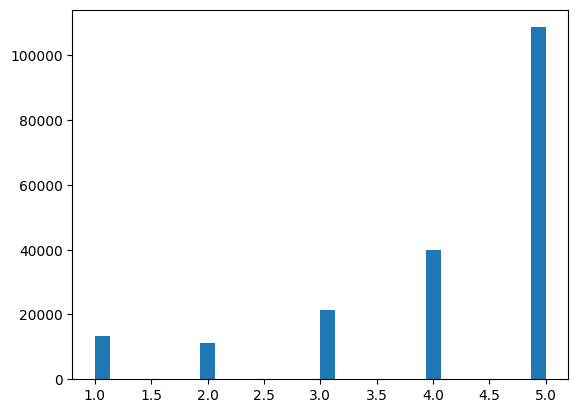

In [56]:
# Identificando a nota mais frequente entre os clientes
plt.hist(dados['overall'], bins=30)
plt.show()